## Time Series Project

1. Explore the electricity dataset, using tools like line charts and decomposition
2. Forecast the first three days of February 2017 (72 hours) of electricity consumption for column `PowerConsumption_Zone1`, using the entire month of January 2017 to train your Model.
3. Fit both a Linear Regression model and Facebook Prophet. Compare their accuracy using plots of predicted vs. actual, as well as metrics like MAE and MAPE


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

electricity_df = pd.read_csv(
    "../Data/powerconsumption.csv", 
    index_col=["Datetime"],
    parse_dates=["Datetime"]
).resample("H").mean()

electricity_df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433


<Axes: xlabel='Datetime'>

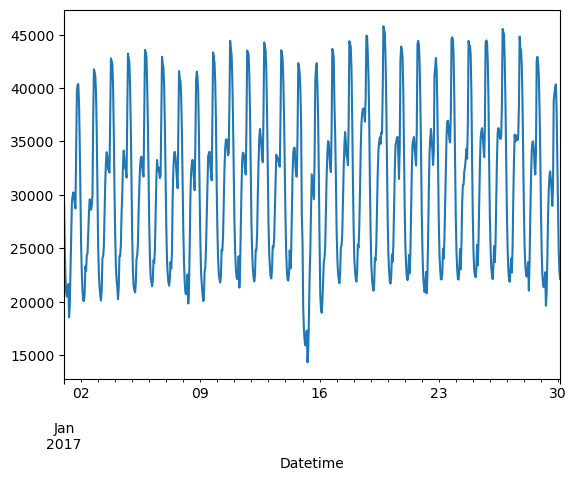

## Linear Regression

In [22]:
electricity_df = pd.read_csv(
    "../Data/powerconsumption.csv",
    usecols=["PowerConsumption_Zone1", "Datetime"],
    index_col=["Datetime"],
    parse_dates=["Datetime"]
).resample("H").mean().reset_index()

electricity_df.head()

,Datetime,PowerConsumption_Zone1
0,2017-01-01 00:00:00,29197.974683
1,2017-01-01 01:00:00,24657.215190
2,2017-01-01 02:00:00,22083.037973
3,2017-01-01 03:00:00,20811.139240
4,2017-01-01 04:00:00,20475.949367


## Facebook Prophet

In [28]:
from prophet import Prophet
